In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
df_full = pd.read_csv('../Data/spy_full.csv')
df_month = pd.read_csv('../Data/spy_month.csv')
df_week = pd.read_csv('../Data/spy_week.csv')

In [66]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_month['date'] = pd.to_datetime(df_month['date'])
df_week['date'] = pd.to_datetime(df_week['date'])
start_date = df_full['date'].min()

In [67]:
def get_days_since_start(date):
    return (date - start_date).days / 100
df_full = df_full.assign(index=df_full['date'].apply(get_days_since_start))
df_full = (df_full
           .assign(index_sq=df_full['index'].apply(lambda x:x**2))
           .assign(index_e=df_full['index'].apply(lambda x:np.e**x)))
df_month = df_month.assign(index=df_month['date'].apply(get_days_since_start))
df_month = (df_month
            .assign(index_sq=df_month['index'].apply(lambda x:x**2))
            .assign(index_e=df_month['index'].apply(lambda x:np.e**x))
            )
df_week = df_week.assign(index=df_week['date'].apply(get_days_since_start))
df_week = (df_week
           .assign(index_sq=df_week['index'].apply(lambda x:x**2))
           .assign(index_e=df_week['index'].apply(lambda x:np.e**x))
           )

In [68]:
poly = LinearRegression().fit(df_month[['index_sq']], df_month['close_price'])
expo = LinearRegression().fit(df_week[['index_e']], df_week['close_price'])

In [69]:
df_month_test = df_full[~df_full['date'].isin(df_month['date'])]
poly_month_test = poly.predict(df_month_test[['index_sq']])
expo_month_test = expo.predict(df_month_test[['index_e']])
poly_month_mse = mean_squared_error(df_month_test['close_price'], poly_month_test)
expo_month_mse = mean_squared_error(df_month_test['close_price'], expo_month_test)
print(f'Poly MSE: {poly_month_mse}\n'
      f'Expo MSE: {expo_month_mse}\n')

Poly MSE: 1859.7914566607935
Expo MSE: 13554.257024094946



In [70]:
df_week_test = df_full[~df_full['date'].isin(df_week['date'])]
poly_week_test = poly.predict(df_week_test[['index_sq']])
expo_week_test = expo.predict(df_week_test[['index_e']])
poly_week_mse = mean_squared_error(df_week_test['close_price'], poly_week_test)
expo_week_mse = mean_squared_error(df_week_test['close_price'], expo_week_test)
print(f'Poly MSE: {poly_week_mse}\n'
      f'Expo MSE: {expo_week_mse}\n')

Poly MSE: 1860.956540393641
Expo MSE: 13580.127069406675



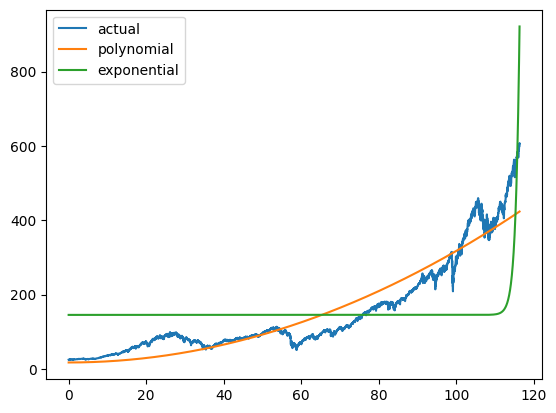

In [79]:
plt.plot(df_month_test['index'],df_month_test['close_price'],label='actual')
plt.plot(df_month_test['index'],poly_month_test,label='polynomial')
plt.plot(df_month_test['index'],expo_month_test,label='exponential')
plt.legend()
plt.show()